# eRNA count matrix analysis

In [2]:
library(magrittr)
library(dplyr)
library(stringi)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
setwd(here::here()) # set working directory to project root
getwd()


[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

In [4]:
#with fread
library(data.table)

erna_exrs_matrix <- data.table::fread("GSE126074_SNARE_seq/06_count_eRNA/erna_exrs_matrix.tsv", header = TRUE, sep = "\t", data.table = FALSE)
row.names(erna_exrs_matrix) <- erna_exrs_matrix$V1
erna_exrs_matrix$V1 <- NULL



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [5]:
erna_exrs_matrix[1:10,1:10]

,AAAAACGGCCTG,AAAACACTCCTG,AAAACCGGTACC,AAAACGCCTTTC,AAAAGTGTCACG,AAAATTCGATCA,AAACATCCCAGC,AAACCATTCTTC,AAACCCATGTAC,AAACCGCCATAT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSR10_739T55,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0
ENSR10_73CRCM,0,0,0,0,0,0,0,0,0,0
ENSR10_73FMNJ,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0
ENSR10_73R2M6,0,0,0,0,0,0,0,0,0,0
ENSR10_73RF34,0,0,0,0,0,0,0,0,0,0
ENSR10_73RXQ7,0,0,0,0,0,0,0,0,0,0


In [6]:
# remove rows that are not eRNAs
ro_remove =  c("__no_feature", "__ambiguous", "__too_low_aQual", 
"__not_aligned", "__alignment_not_unique")
erna_exrs_matrix <- erna_exrs_matrix[!rownames(erna_exrs_matrix) %in% ro_remove, ]

In [7]:
dim(erna_exrs_matrix)

[1] 177340   1047

In [8]:
# unexpressed cells count
unexpr_cells = colSums(erna_exrs_matrix==0)
paste0("unexpressed cells: ", sum(unexpr_cells==nrow(erna_exrs_matrix))," out of ", ncol(erna_exrs_matrix))
# unexpssed rows count
unexpr_rows = rowSums(erna_exrs_matrix==0)
paste0("unexpressed eRNA: ", sum(unexpr_rows==ncol(erna_exrs_matrix))," out of ", nrow(erna_exrs_matrix))



[1] "unexpressed cells: 95 out of 1047"

[1] "unexpressed eRNA: 174088 out of 177340"

In [9]:
# precent of zeros in the matrix
print(paste0(" precent of zeros: ",sum(erna_exrs_matrix == 0) / (nrow(erna_exrs_matrix) * ncol(erna_exrs_matrix))))

# number of cells with more than 0 counts
print(paste0("number of cells with more than 0 counts: ", sum(colSums(erna_exrs_matrix) > 0)))

# number of eRNAs with more than 0 counts
print(paste0("number of eRNAs with more than 0 counts: ", sum(rowSums(erna_exrs_matrix) > 0)))


[1] " precent of zeros: 0.999979539515771"
[1] "number of cells with more than 0 counts: 952"
[1] "number of eRNAs with more than 0 counts: 3252"


In [10]:
# filter the matrix to only include expressed eRNAs and cells with more than 0 counts
expressed_erna_exrs_matrix <- erna_exrs_matrix[rowSums(erna_exrs_matrix) > 0,colSums(erna_exrs_matrix) > 0]

In [11]:
# show first 100 sums of cells
colSums(expressed_erna_exrs_matrix) %>% head(100)

AAAAACGGCCTG AAAACCGGTACC AAAACGCCTTTC AAAAGTGTCACG AAAATTCGATCA AAACATCCCAGC 
           4            1            5           12            2            4 
AAACCATTCTTC AAACCCATGTAC AAACCGCCATAT AAACCGGATATC AAACGAAAAGTC AAACGAACGATG 
           3            2            5            1            4            3 
AAAGGACTTAGT AAAGTGCCACAT AAATACGCCAAG AAATATGATAGA AAATCGATGAAT AAATTCAGGCGG 
           3            3            3            1            5           12 
AACAAAATGGAA AACAAACGACCA AACACAGGACAT AACAGTTCCAAC AACATCCATTCT AACATCCCTGAG 
           3            5            2            3            9            4 
AACCATAGTTAG AACCCACGTGGT AACCCCGGCCAG AACCGTTAGGTC AACCTCACTATA AACCTTTAGCCC 
           4            2            4            9            2            5 
AACGGGCCGCCA AACGTACGAACC AACGTCCTACTA AACTAGCCAAAG AACTCAGTTATG AACTGATGGCTA 
           2            1            4            3            5            1 
AACTGTGCTAGT AACTTACAACAG AACTTGGGACTT AAGAAGCCACAG AAGATTTAGGTA AAGCCTGATGCC 
           3            5            4            3            4            1 
AAGCCTGGGGGC AAGCCTGTTGTA AAGCTGGACGAT AAGCTTTCCAAT AAGGAGAAATGT AAGGCCCGCCAC 
           1            7            3            3           11            3 
AAGGCTGGTGAC AAGGCTTGCTGC AAGGGGCGACTC AAGGGTGCTAAC AAGGTCAGCGGC AAGGTCCTCAGC 
           3            2            2            1            5            1 
AAGGTGTCTCCA AAGTCGATCAAC AAGTTCCGAAAT AAGTTGTTCGCG AATAAATCTATC AATAGCACTGAA 
           5           10            4            5            5            4 
AATCTATGTCGC AATGATTCTGGC AATGCCAGACTA AATGTAGTCTCT AATTCACGTATG AATTCTTGCCAA 
           4            3            3            4            3            2 
AATTTGGGAGCA AATTTGTACATG ACAAATAACAGT ACAACCACCAAG ACAACGTGATCA ACAAGAGAATTG 
           2            1            8            3            1            3 
ACAAGCTAGGCG ACAATACGCGAG ACAATCCGTCTG ACAATTGCCTAC ACACCCAATATT ACACGTTCGGAT 
           2            2            2            4            3            5 
ACACTCTGTTGC ACACTGAGCAGG ACAGAGAGGACA ACATAAATTAGT ACATCTAGGTAA ACATCTTTGTCC 
           1            3            6            1            7            9 
ACCAACCTCAGT ACCAACGATTCG ACCAGACCCTAT ACCATGGCCATC ACCCGGGAACGA ACCCTCGGTTTA 
           4            3            1            2            4            4 
ACCCTGGAAACC ACCCTGGAGACG ACCCTGTATTAC ACCGCTAGCGGA ACCGGTAGCTGA ACCGTTAGTGAC 
           6            3            6            4            9            6 
ACCGTTGGGGCT ACCGTTTCTCTC ACCTGGGGCAAC ACCTTGACATGG 
           1            3            2            1

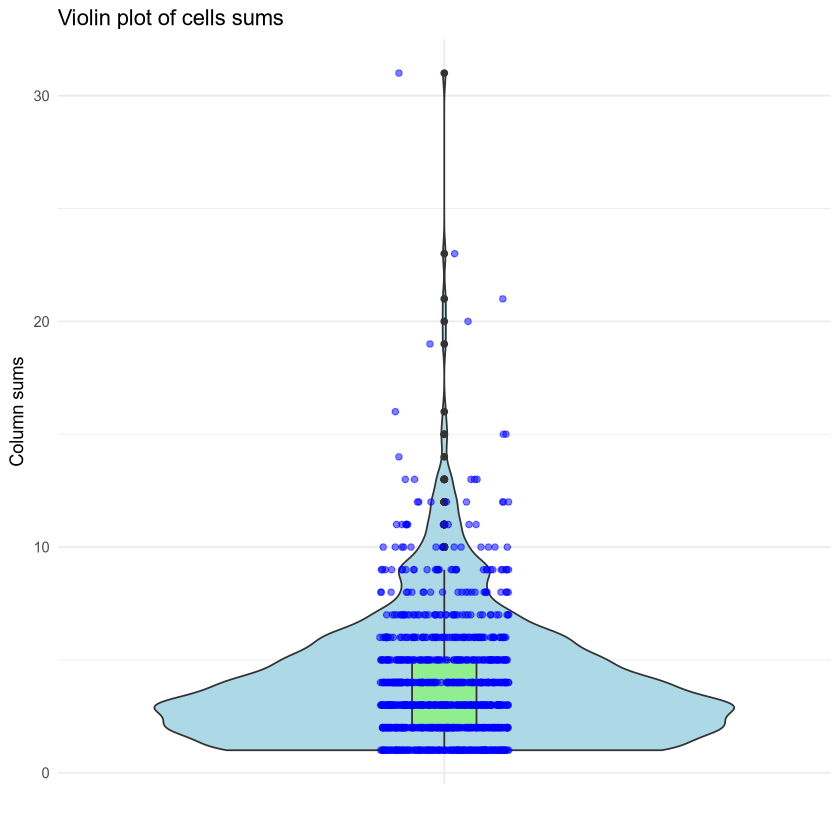

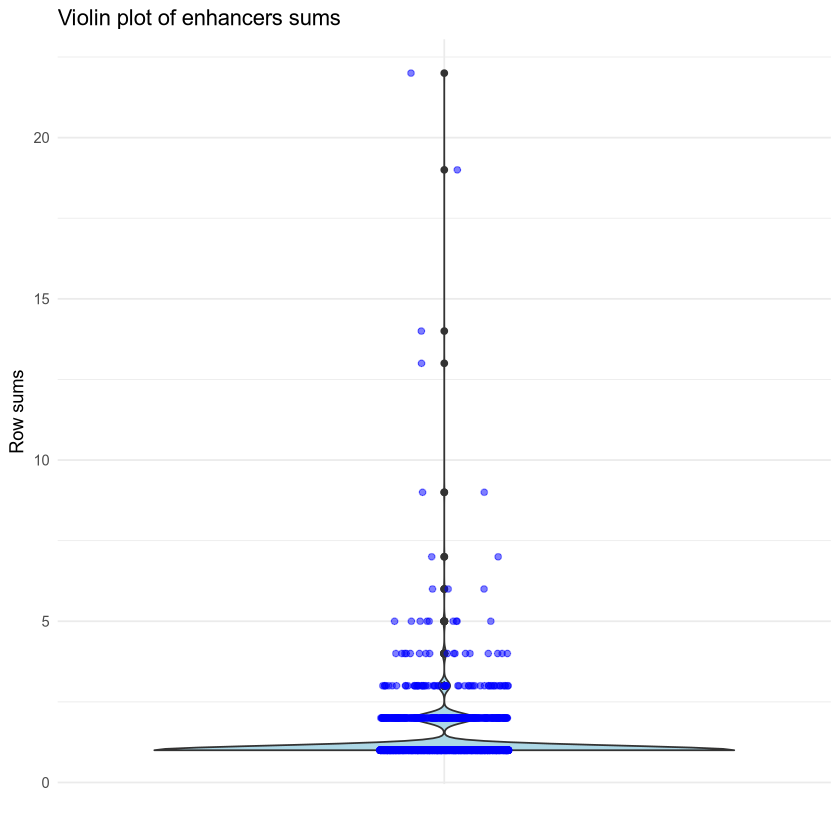

In [12]:
# violin plot of column sums with jittered points
data_cols = data.frame(sum = colSums(expressed_erna_exrs_matrix))
library(ggplot2)
p = ggplot(data_cols, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of cells sums", x = "", y = "Column sums") +
  theme_minimal()

print(p)
# violin plot of row sums
data_rows = data.frame(sum = rowSums(expressed_erna_exrs_matrix))
p = ggplot(data_rows, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of enhancers sums", x = "", y = "Row sums") +
  theme_minimal()
p




   Var1 Freq
1     1  147
2     2  171
3     3  183
4     4  134
5     5   98
6     6   76
7     7   43
8     8   24
9     9   30
10   10   14
11   11   10
12   12    8
13   13    5
14   14    1
15   15    2
16   16    1
17   19    1
18   20    1
19   21    1
20   23    1
21   31    1


   Var1 Freq
1     1 2851
2     2  306
3     3   58
4     4   17
5     5    9
6     6    3
7     7    2
8     9    2
9    13    1
10   14    1
11   19    1
12   22    1


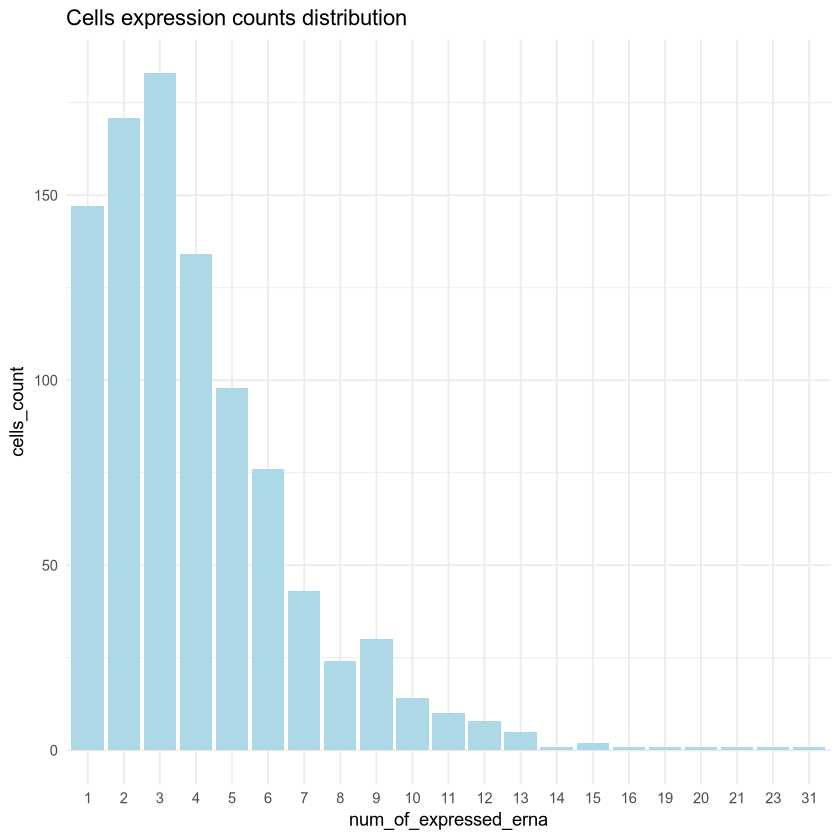

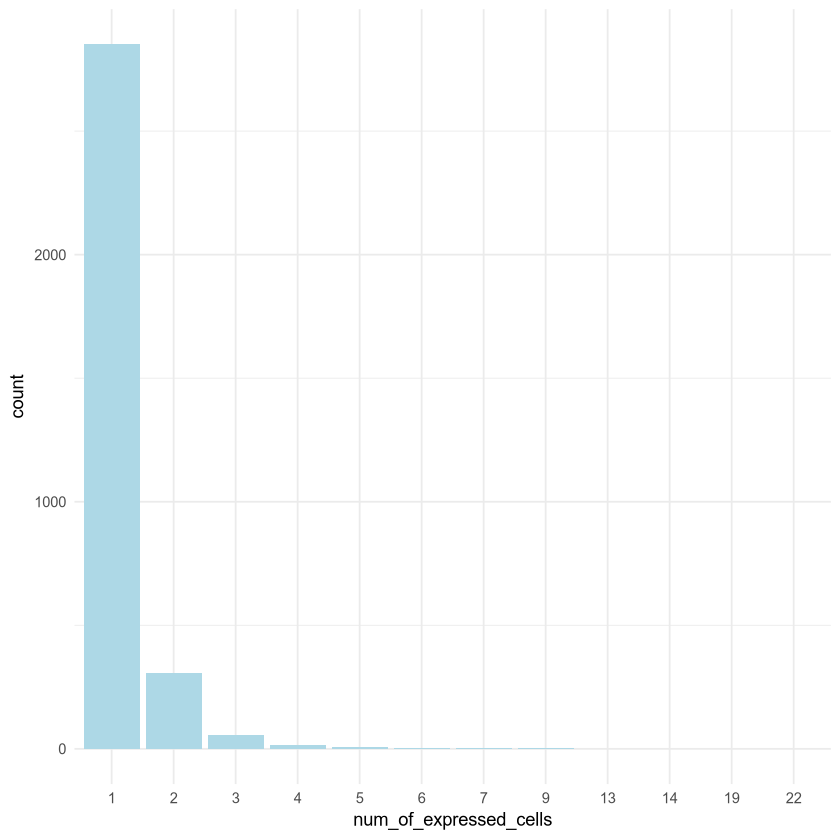

In [13]:
#bar plot of rows distribution
table_data = as.data.frame(table(data_cols$sum))
print(table_data)
colnames(table_data) = c("num_of_expressed_erna", "cells_count")
table_data$expression = as.factor(table_data$num_of_expressed_erna)
p = ggplot(table_data, aes(x = num_of_expressed_erna, y = cells_count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Cells expression counts distribution") +
  theme_minimal()

p

# bar plot of  cells distribution
table_data = as.data.frame(table(data_rows$sum))
print(table_data)
colnames(table_data) = c("num_of_expressed_cells", "count")
table_data$expression = as.factor(table_data$num_of_expressed_cells)
p = ggplot(table_data, aes(x = num_of_expressed_cells, y = count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  theme_minimal()
p 




Loading required package: grid



ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualizati

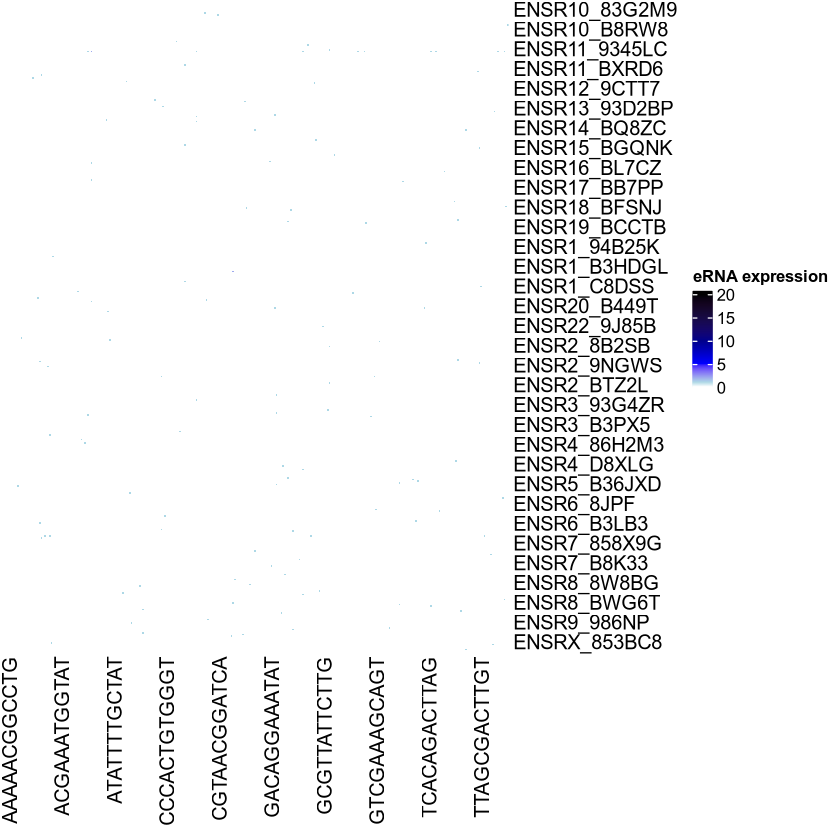

In [14]:
#complex heatmap of the matrix
library(ComplexHeatmap)
library(circlize)
row_labels = rownames(expressed_erna_exrs_matrix)
# show only every 100th label
row_labels[!((1:length(row_labels)) %% 100 == 1)] <- ""
#same for column labels
column_labels = colnames(expressed_erna_exrs_matrix)
column_labels[!((1:length(column_labels)) %% 100 == 1)] <- ""
p = Heatmap(as.matrix(expressed_erna_exrs_matrix), name = "eRNA expression", col = colorRamp2(c(0, 1, 5, 10, 20),
 c("white", "lightblue", "blue", "darkblue", "black")),row_labels = row_labels, column_labels = column_labels, cluster_rows = F, cluster_columns = F,)
p

In [15]:
#save p  as pdf
pdf("GSE126074_SNARE_seq/08_counts_analysis//erna_exrs_heatmap.pdf", width = 10, height = 10)
print(p)
dev.off()

agg_record_1639122727 
                    2

# Read ATAC regions to enhances

In [16]:
atac_regions_to_enhancers <- fread("GSE126074_SNARE_seq/07_regions_to_erna/associated_enhancers_with_chromatin.bed", header = TRUE, sep = "\t", data.table = FALSE)


columns 1-3 are the ATAC region (chr, start, end)  
columns 4 is the region ID (chr_start_end)  
columns 5-8 are the eRNA coordinates and ID (chr, start, end, erna_id)  
column 9 is the type (enhancer only)  
column 10 is the number of overlapping base pairs- 0 if they do not overlap

In [17]:

colnames(atac_regions_to_enhancers) = c("chr", "start", "end", "region", "erna_chr", "erna_start", "erna_end", "erna_id", "type", "overlap_bp")
head(atac_regions_to_enhancers)
dim(atac_regions_to_enhancers)

,chr,start,end,region,erna_chr,erna_start,erna_end,erna_id,type,overlap_bp
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,8,99495798,99496023,chr8:99495798-99496023,.,-1,-1,.,.,0
2,22,21735444,21736416,chr22:21735444-21736416,.,-1,-1,.,.,0
3,3,28241304,28242015,chr3:28241304-28242015,.,-1,-1,.,.,0
4,5,154627638,154628386,chr5:154627638-154628386,5,154627657,154628356,ENSR5_B35NJX,enhancer,699
5,15,79338695,79338894,chr15:79338695-79338894,.,-1,-1,.,.,0
6,15,80002714,80002990,chr15:80002714-80002990,.,-1,-1,.,.,0


[1] 136868     10

In [18]:
all_regions_to_erna = atac_regions_to_enhancers %>% dplyr::filter(overlap_bp > 0) # only keep overlapping regions

In [19]:
all_regions_to_erna = all_regions_to_erna %>% select(region, erna_id) # only keep region and erna_id columns
head(all_regions_to_erna)

,region,erna_id
,<chr>,<chr>
1,chr5:154627638-154628386,ENSR5_B35NJX
2,chr15:83092494-83092876,ENSR15_BLH8H
3,chr15:89680292-89680833,ENSR15_BMRJL
4,chr5:142548724-142549161,ENSR5_B339SD
5,chr15:90463377-90463653,ENSR15_93BWGR
6,chr15:90710364-90710746,ENSR15_84N28K


Read ATAC counts matrix

In [20]:
atac_counts <- fread("GSE126074_SNARE_seq/01_raw_data/GSE126074/GSE126074_CellLineMixture_SNAREseq_chromatin_counts.tsv",
 header = F, sep = "\t", data.table = FALSE,skip = 1)
row.names(atac_counts) <- atac_counts$V1
atac_counts$V1 <- NULL

In [21]:
# set colnames from the first row of the file
fread("GSE126074_SNARE_seq/01_raw_data/GSE126074/GSE126074_CellLineMixture_SNAREseq_chromatin_counts.tsv",
 header = F, sep = "\t", data.table = FALSE,nrows = 1) %>% as.character() %>% unlist() -> colnames(atac_counts)

In [22]:
atac_counts$region = rownames(atac_counts) # add region column from rownames for merging
head(atac_counts)

,ACTTTCTAATCA,GAGAGAAAACCT,TACGGCTGTTAT,GACGCGTAAGTG,GAAAGGACTGCA,TGACCTGGATAA,ACTCCGTTCACT,TAGGTAGCGCGC,CTCTACCCTTCA,GCCCGTTATCTG,⋯,TTCCCCTACAAC,TGTAATCATCTG,ACATAAATTAGT,ATAGTGCTCGCC,GTTCTTCCTAGT,ATCCGTTCAACG,CCGACTAAGAAT,AAGCCTGGGGGC,CAGCTGGTGATG,region
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
chr2:148881654-148881927,1,1,3,0,0,13,1,0,0,2,⋯,0,0,0,0,0,0,4,0,2,chr2:148881654-148881927
chr8:99495798-99496023,1,1,0,0,0,8,0,1,0,0,⋯,0,1,0,0,2,3,0,1,1,chr8:99495798-99496023
chr22:21735444-21736416,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,chr22:21735444-21736416
chr3:28241304-28242015,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,chr3:28241304-28242015
chr5:154627638-154628386,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,chr5:154627638-154628386
chr15:79338695-79338894,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,chr15:79338695-79338894


In [30]:
atac_with_enhancers <- 
  left_join(atac_counts, all_regions_to_erna, by = "region") %>%
  filter(!is.na(erna_id))   
head(atac_with_enhancers)

,ACTTTCTAATCA,GAGAGAAAACCT,TACGGCTGTTAT,GACGCGTAAGTG,GAAAGGACTGCA,TGACCTGGATAA,ACTCCGTTCACT,TAGGTAGCGCGC,CTCTACCCTTCA,GCCCGTTATCTG,⋯,TGTAATCATCTG,ACATAAATTAGT,ATAGTGCTCGCC,GTTCTTCCTAGT,ATCCGTTCAACG,CCGACTAAGAAT,AAGCCTGGGGGC,CAGCTGGTGATG,region,erna_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr5:154627638-154628386,ENSR5_B35NJX
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr15:83092494-83092876,ENSR15_BLH8H
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr15:89680292-89680833,ENSR15_BMRJL
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr5:142548724-142549161,ENSR5_B339SD
5,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,chr15:90463377-90463653,ENSR15_93BWGR
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr15:90710364-90710746,ENSR15_84N28K


In [31]:
#sanity check - print any value from atac_counts and see if it is the same in atac_with_enhancers
all_regions = c("chr8:38588602-38588903", "chr9:107929412-107929812", "chr11:35588677-35588987", 
"chr14:53946599-53947210", "chr15:31197437-31197731", "chr1:220734567-220734790", 
"chr1:26083355-26083605")
for(region in all_regions){
  print(atac_counts[region,'ACTTTCTAATCA'])
  print(atac_with_enhancers[atac_with_enhancers$region == region,'ACTTTCTAATCA'])
  print("-----")
}


[1] 1
[1] 1
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 1
[1] 1
[1] "-----"


In [32]:
# are any duplicated erna ids?
duplicated_erna_ids <- atac_with_enhancers$erna_id[duplicated(atac_with_enhancers$erna_id)]
length(duplicated_erna_ids)
head(duplicated_erna_ids)

atac_with_enhancers[atac_with_enhancers$erna_id == "ENSR11_CDZ84",]

[1] 2151

[1] "ENSR19_D33XF" "ENSR2_BPJK2"  "ENSR10_C8X72" "ENSR14_BJFRL" "ENSR6_DPLH"  
[6] "ENSR6_DPLH"

,ACTTTCTAATCA,GAGAGAAAACCT,TACGGCTGTTAT,GACGCGTAAGTG,GAAAGGACTGCA,TGACCTGGATAA,ACTCCGTTCACT,TAGGTAGCGCGC,CTCTACCCTTCA,GCCCGTTATCTG,⋯,TGTAATCATCTG,ACATAAATTAGT,ATAGTGCTCGCC,GTTCTTCCTAGT,ATCCGTTCAACG,CCGACTAAGAAT,AAGCCTGGGGGC,CAGCTGGTGATG,region,erna_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
4370,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr11:110564714-110564984,ENSR11_CDZ84
4575,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr11:110565125-110565866,ENSR11_CDZ84


In [33]:
rownames(atac_with_enhancers) <- make.unique(atac_with_enhancers$erna_id)


In [34]:
atac_with_enhancers = atac_with_enhancers %>% select(-region) %>% select(-erna_id)
atac_with_enhancers = atac_with_enhancers[rownames(expressed_erna_exrs_matrix), colnames(expressed_erna_exrs_matrix) ] 

In [41]:
erna_from_atac <- c(as.matrix(atac_with_enhancers))
erna_from_rnaseq <- c(as.matrix(expressed_erna_exrs_matrix))
#binarize the data
erna_from_atac[erna_from_atac > 0] <- 1
erna_from_rnaseq[erna_from_rnaseq > 0] <- 1
contingency_df = data.frame('erna_from_atac' = erna_from_atac, 'erna_from_rnaseq' = erna_from_rnaseq) %>% na.omit()
contingency_table <- table(contingency_df)
contingency_table


              erna_from_rnaseq
erna_from_atac       0       1
             0 1276441    1563
             1    7180      16


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.02569
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.037041 2.966674
sample estimates:
odds ratio 
  1.819945 


You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



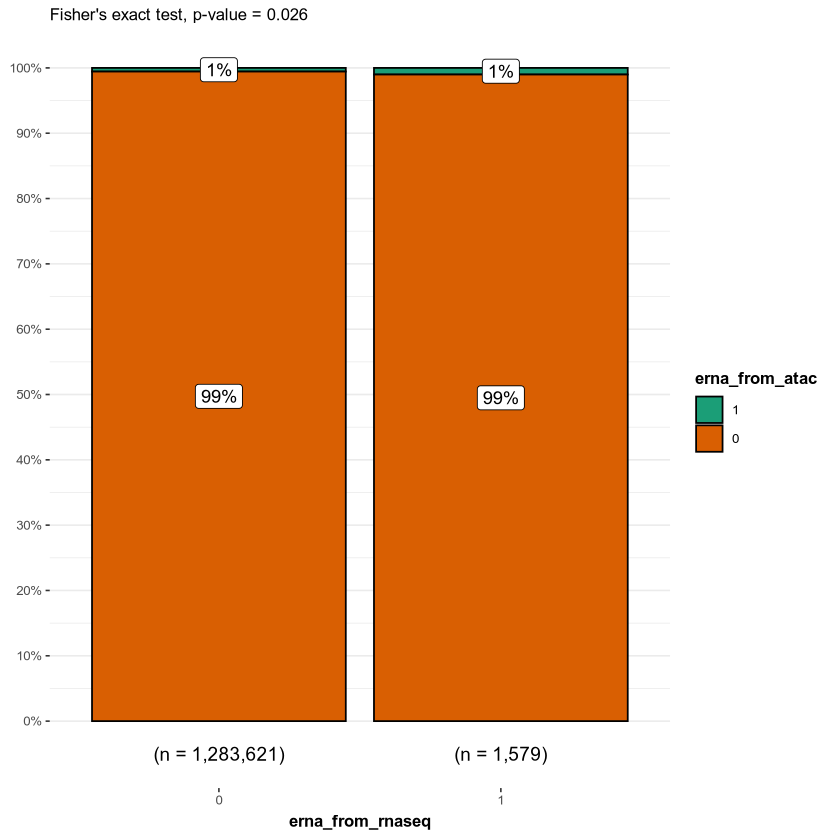

In [42]:
test <- fisher.test(contingency_table)
test
# combine plot and statistical test with ggbarstats
library(ggstatsplot)
ggbarstats(
  contingency_df, 'erna_from_atac', 'erna_from_rnaseq',
  results.subtitle = FALSE,
  subtitle = paste0(
    "Fisher's exact test", ", p-value = ",
    ifelse(test$p.value < 0.001, "< 0.001", round(test$p.value, 3))
  )
)